#Planar data classification with one hidden layer


Source: https://github.com/amanchadha/coursera-deep-learning-specialization/blob/master/C1%20-%20Neural%20Networks%20and%20Deep%20Learning/Week%203/Planar%20data%20classification%20with%20one%20hidden%20layer/Planar_data_classification_with_onehidden_layer_v6c.ipynb

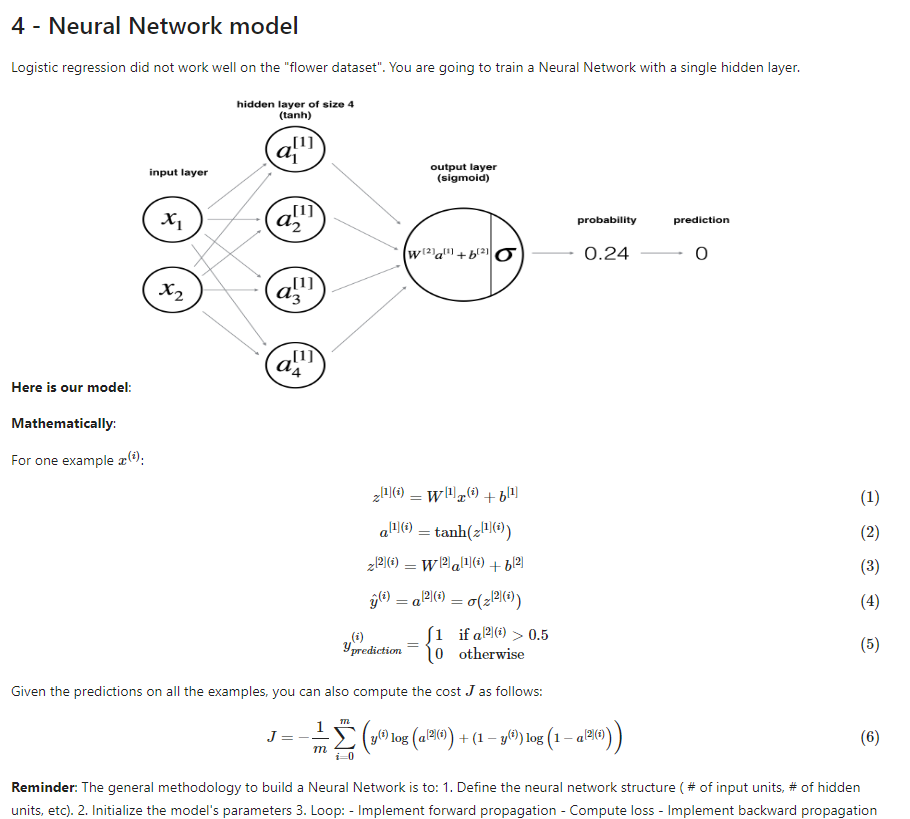

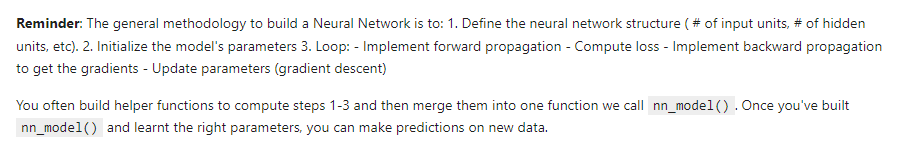

Epoch 1/50
23/23 [==============================] - 2s 31ms/step - loss: 0.7561 - accuracy: 0.4028 - val_loss: 0.7390 - val_accuracy: 0.2875
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 0.7050 - accuracy: 0.4306 - val_loss: 0.6860 - val_accuracy: 0.4000
Epoch 3/50
23/23 [==============================] - 0s 17ms/step - loss: 0.6612 - accuracy: 0.5681 - val_loss: 0.6433 - val_accuracy: 0.5375
Epoch 4/50
23/23 [==============================] - 1s 26ms/step - loss: 0.6241 - accuracy: 0.6347 - val_loss: 0.6066 - val_accuracy: 0.6500
Epoch 5/50
23/23 [==============================] - 1s 31ms/step - loss: 0.5902 - accuracy: 0.6972 - val_loss: 0.5756 - val_accuracy: 0.6625
Epoch 6/50
23/23 [==============================] - 1s 25ms/step - loss: 0.5603 - accuracy: 0.7417 - val_loss: 0.5473 - val_accuracy: 0.7375
Epoch 7/50
23/23 [==============================] - 1s 24ms/step - loss: 0.5327 - accuracy: 0.7625 - val_loss: 0.5221 - val_accuracy: 0.7625
Epoch 8/50
23/

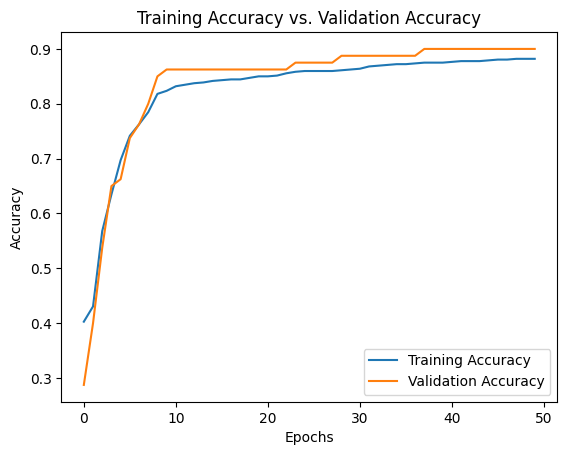

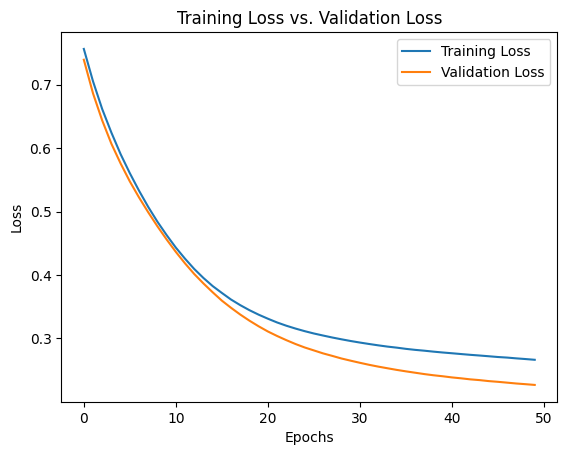

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic data (moons dataset)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)  # Normalize features

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build the shallow neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Step 7: Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy vs. Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs. Validation Loss')
plt.show()

133/133 [==============================] - 1s 4ms/step


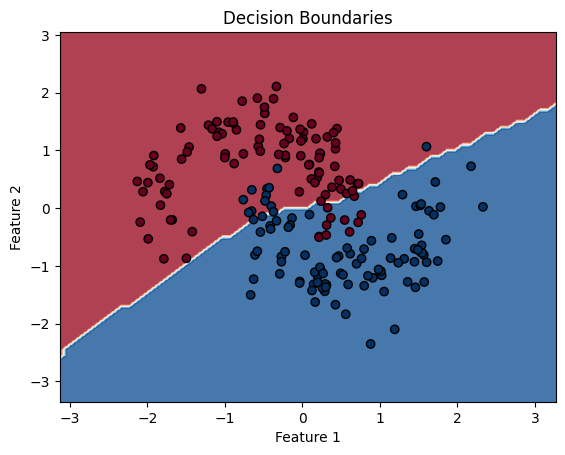

In [ ]:
# Step 7: Plot decision boundaries
def plot_decision_boundary(X, y, model):
    # Define the meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the probabilities for each point in the meshgrid
    meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
    Z_probs = model.predict(meshgrid_points)
    Z_classes = (Z_probs > 0.5).astype(int)
    Z_classes = Z_classes.reshape(xx.shape)

    # Plot the contour plot
    plt.contourf(xx, yy, Z_classes, alpha=0.8, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.title('Decision Boundaries')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries using the trained model
plot_decision_boundary(X_test, y_test, model)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic data (moons dataset)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)  # Normalize features

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create and train a model
def create_and_train_model(hidden_layers, units_per_layer):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(2,)))

    for i in range(hidden_layers):
        model.add(tf.keras.layers.Dense(units_per_layer, activation='relu'))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    return model, history

# Create and train five different models
models = []
histories = []

hidden_layers_list = [1, 2, 2, 3, 3]
units_per_layer_list = [10, 5, 10, 5, 10]

for i in range(5):
    hidden_layers = hidden_layers_list[i]
    units_per_layer = units_per_layer_list[i]

    model, history = create_and_train_model(hidden_layers, units_per_layer)
    models.append(model)
    histories.append(history)

133/133 [==============================] - 0s 1ms/step


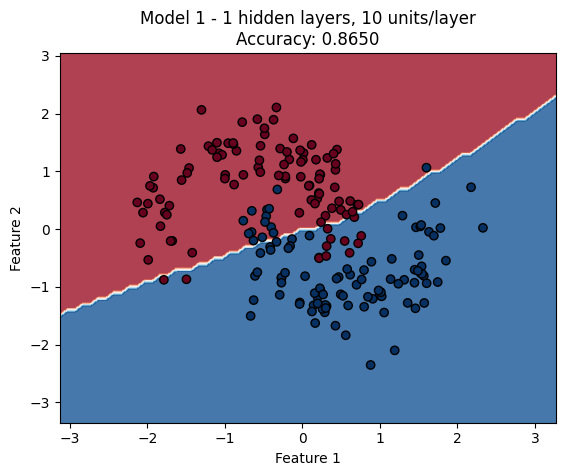

133/133 [==============================] - 0s 1ms/step


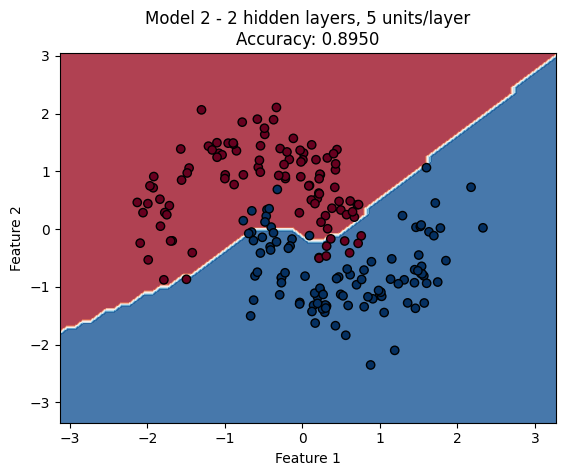

133/133 [==============================] - 0s 1ms/step


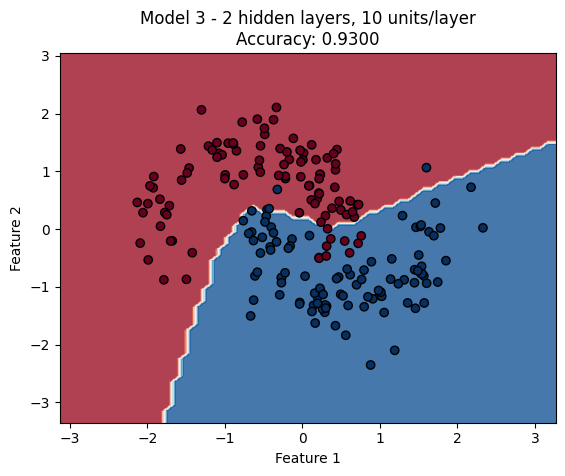

133/133 [==============================] - 0s 1ms/step


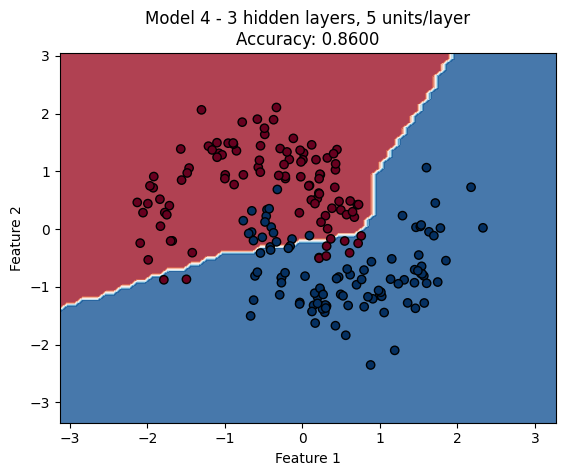

133/133 [==============================] - 0s 1ms/step


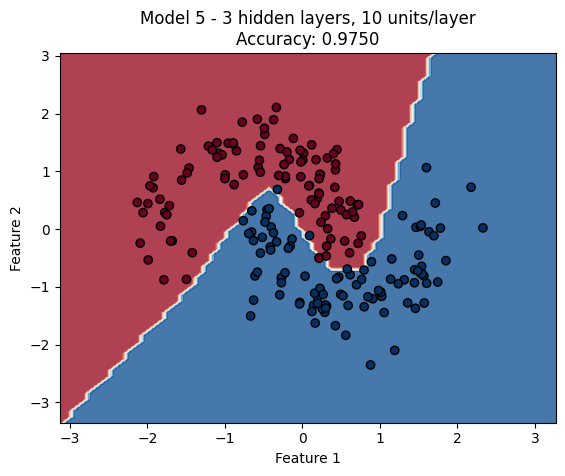

Model 1 Accuracy: 0.8650
Model 2 Accuracy: 0.8950
Model 3 Accuracy: 0.9300
Model 4 Accuracy: 0.8600
Model 5 Accuracy: 0.9750


In [ ]:
# Define a function to plot decision boundaries for a model
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Evaluate and compare models
accuracies = []

for i, model in enumerate(models):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

    title = f"Model {i+1} - {hidden_layers_list[i]} hidden layers, {units_per_layer_list[i]} units/layer\nAccuracy: {accuracy:.4f}"
    plot_decision_boundary(X_test, y_test, model, title)

# Display model accuracies
for i, accuracy in enumerate(accuracies):
    print(f"Model {i+1} Accuracy: {accuracy:.4f}")

313/313 [==============================] - 0s 1ms/step


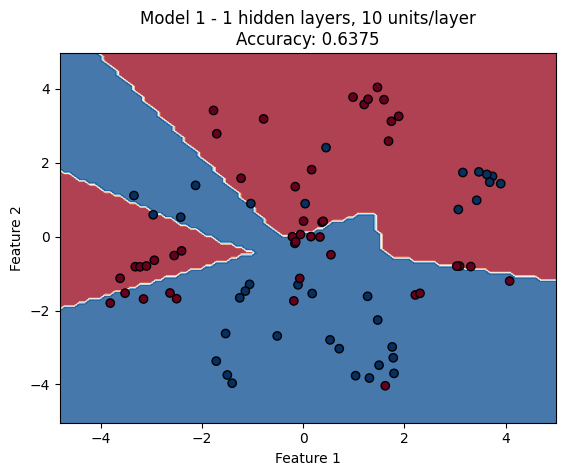

313/313 [==============================] - 0s 1ms/step


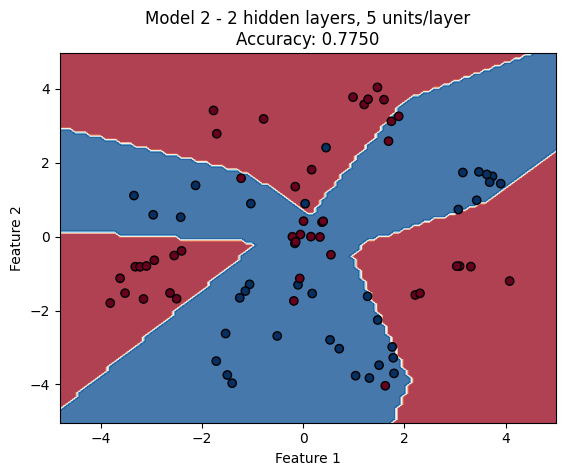

313/313 [==============================] - 0s 1ms/step


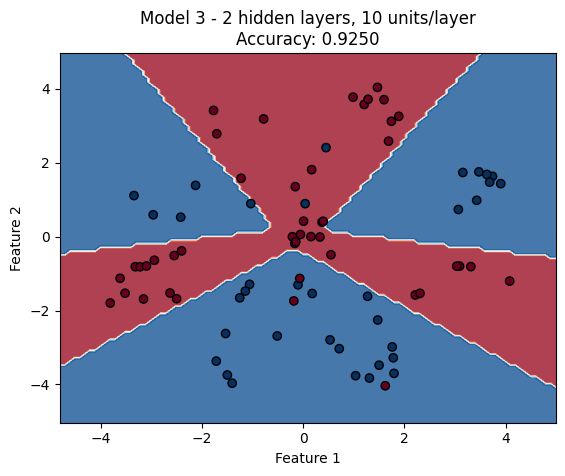

313/313 [==============================] - 1s 2ms/step


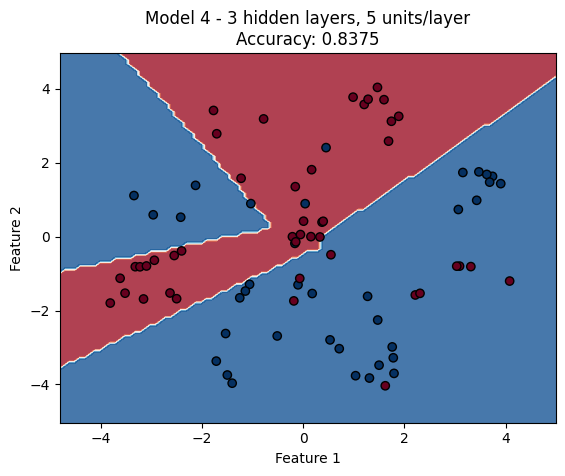

313/313 [==============================] - 0s 1ms/step


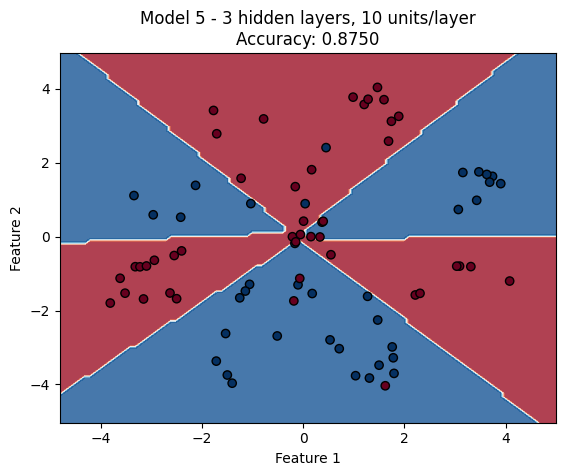

Model 1 Accuracy: 0.6375
Model 2 Accuracy: 0.7750
Model 3 Accuracy: 0.9250
Model 4 Accuracy: 0.8375
Model 5 Accuracy: 0.8750


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Assuming load_planar_dataset() loads your custom planar dataset
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

# Step 1: Load the planar dataset
X, Y = load_planar_dataset()

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X.T, Y.T, test_size=0.2, random_state=42)

# Define a function to create and train a model
def create_and_train_model(hidden_layers, units_per_layer):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))

    for i in range(hidden_layers):
        model.add(tf.keras.layers.Dense(units_per_layer, activation='relu'))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    return model, history

# Create and train five different models
models = []
histories = []

hidden_layers_list = [1, 2, 2, 3, 3]
units_per_layer_list = [10, 5, 10, 5, 10]

for i in range(5):
    hidden_layers = hidden_layers_list[i]
    units_per_layer = units_per_layer_list[i]

    model, history = create_and_train_model(hidden_layers, units_per_layer)
    models.append(model)
    histories.append(history)

# Define a function to plot decision boundaries for a model
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Evaluate and compare models
accuracies = []

for i, model in enumerate(models):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

    title = f"Model {i+1} - {hidden_layers_list[i]} hidden layers, {units_per_layer_list[i]} units/layer\nAccuracy: {accuracy:.4f}"
    plot_decision_boundary(X_test, y_test, model, title)

# Display model accuracies
for i, accuracy in enumerate(accuracies):
    print(f"Model {i+1} Accuracy: {accuracy:.4f}")


#A NN from Scratch

Epoch 0: Cost = 0.6931
Epoch 100: Cost = 0.6931
Epoch 200: Cost = 0.6931
Epoch 300: Cost = 0.6931
Epoch 400: Cost = 0.6931
Epoch 500: Cost = 0.6931
Epoch 600: Cost = 0.6931
Epoch 700: Cost = 0.6931
Epoch 800: Cost = 0.6931
Epoch 900: Cost = 0.6931


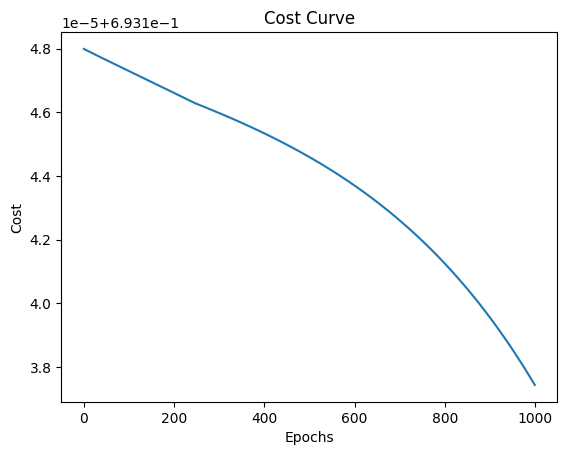

Predictions: [[1 1 0 0]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)  # For reproducibility

    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))

    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return parameters

def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]

    # Hidden layer (ReLU activation)
    Z1 = np.dot(W1, X) + b1
    A1 = np.maximum(0, Z1)  # ReLU activation

    # Output layer (sigmoid activation)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))  # Sigmoid activation

    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }

    return A2, cache

def compute_cost(A2, Y):
    m = Y.shape[1]  # Number of examples

    # Binary cross-entropy cost
    cost = -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    cost = np.squeeze(cost)  # Ensure cost is a scalar

    return cost

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]  # Number of examples
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    A1, A2 = cache["A1"], cache["A2"]

    # Output layer gradients
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    # Hidden layer gradients (ReLU activation)
    dZ1 = np.dot(W2.T, dZ2) * (A1 > 0)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return gradients

def update_parameters(parameters, gradients, learning_rate):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    dW1, db1, dW2, db2 = gradients["dW1"], gradients["db1"], gradients["dW2"], gradients["db2"]

    # Update parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    updated_parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return updated_parameters

def predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(int)

    return predictions

def neural_network_model(X, Y, hidden_size, learning_rate, num_epochs):
    input_size = X.shape[0]
    output_size = Y.shape[0]

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    costs = []

    for epoch in range(num_epochs):
        # Forward propagation
        A2, cache = forward_propagation(X, parameters)

        # Compute cost
        cost = compute_cost(A2, Y)
        costs.append(cost)

        # Backward propagation
        gradients = backward_propagation(parameters, cache, X, Y)

        # Update parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        # Print cost every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost:.4f}")

    # Plot the cost curve
    plt.plot(costs)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.title("Cost Curve")
    plt.show()

    return parameters

# Example usage:
np.random.seed(42)  # For reproducibility

# Generate synthetic dataset (sample data)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
Y = np.array([[0, 1, 1, 0]])

# Define hyperparameters
hidden_size = 4
learning_rate = 0.01
num_epochs = 1000

# Train the neural network model
final_parameters = neural_network_model(X, Y, hidden_size, learning_rate, num_epochs)

# Make predictions
predictions = predict(final_parameters, X)
print("Predictions:", predictions)

Epoch 0: Cost = 0.6932
Epoch 100: Cost = 0.6923
Epoch 200: Cost = 0.6901
Epoch 300: Cost = 0.6811
Epoch 400: Cost = 0.6503
Epoch 500: Cost = 0.5746
Epoch 600: Cost = 0.4559
Epoch 700: Cost = 0.3655
Epoch 800: Cost = 0.3041
Epoch 900: Cost = 0.2602


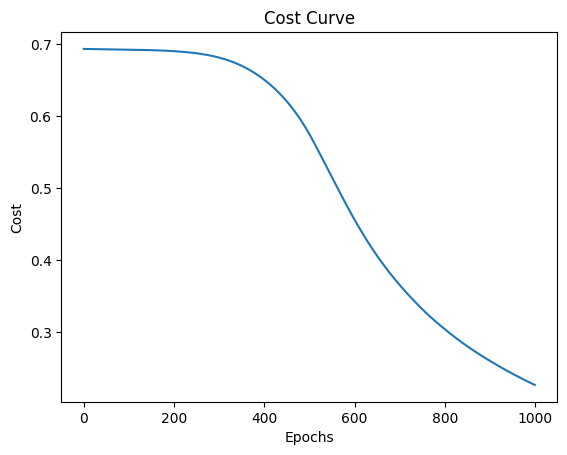

Test Accuracy: 1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Select two classes for binary classification: Iris-setosa (class 0) and Iris-versicolor (class 1)
X_binary = X[(y == 0) | (y == 1)]
y_binary = y[(y == 0) | (y == 1)]

# Convert class labels to binary: 0 (Iris-setosa) and 1 (Iris-versicolor)
y_binary[y_binary == 0] = 0
y_binary[y_binary == 1] = 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Transpose the data for neural network operations (features as columns)
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)  # For reproducibility

    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))

    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return parameters

def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]

    # Hidden layer (ReLU activation)
    Z1 = np.dot(W1, X) + b1
    A1 = np.maximum(0, Z1)  # ReLU activation

    # Output layer (sigmoid activation)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))  # Sigmoid activation

    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }

    return A2, cache

def compute_cost(A2, Y):
    m = Y.shape[1]  # Number of examples

    # Binary cross-entropy cost
    cost = -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    cost = np.squeeze(cost)  # Ensure cost is a scalar

    return cost

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]  # Number of examples
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    A1, A2 = cache["A1"], cache["A2"]

    # Output layer gradients
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    # Hidden layer gradients (ReLU activation)
    dZ1 = np.dot(W2.T, dZ2) * (A1 > 0)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return gradients

def update_parameters(parameters, gradients, learning_rate):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    dW1, db1, dW2, db2 = gradients["dW1"], gradients["db1"], gradients["dW2"], gradients["db2"]

    # Update parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    updated_parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return updated_parameters

def predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(int)

    return predictions

def neural_network_model(X, Y, hidden_size, learning_rate, num_epochs):
    input_size = X.shape[0]
    output_size = Y.shape[0]

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    costs = []

    for epoch in range(num_epochs):
        # Forward propagation
        A2, cache = forward_propagation(X, parameters)

        # Compute cost
        cost = compute_cost(A2, Y)
        costs.append(cost)

        # Backward propagation
        gradients = backward_propagation(parameters, cache, X, Y)

        # Update parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        # Print cost every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost:.4f}")

    # Plot the cost curve
    plt.plot(costs)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.title("Cost Curve")
    plt.show()

    return parameters

# Define hyperparameters
hidden_size = 4
learning_rate = 0.01
num_epochs = 1000

# Train the neural network model
final_parameters = neural_network_model(X_train, y_train, hidden_size, learning_rate, num_epochs)

# Evaluate the trained model on the test set
predictions = predict(final_parameters, X_test)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy}")